In [243]:
import numpy as np
import numpy.linalg
import matplotlib.pyplot as plt

## Linear elements

### Dirichlet problem
$$ \begin{cases} -u''(x) = 1,\quad x\in [0,1], \\ u(0)=0, \\ u(1)=1 \end{cases}$$

In [260]:
n = 20 #number of elements
x = np.linspace(0,1,n+1)    # Definition of the n+1 vertices of the elements
h = 1/n                 # Uniform element length
dim = 1*n+1                # Number of nodes in the triangulation of [a,b] 
A = np.zeros((dim,dim))     # Linear matrix.
f = np.zeros(dim)     

for i in range(n): 
    A[i:i+2, i:i+2] = A[i:i+2, i:i+2] + np.array([[1,-1], [-1, 1]])/h
    f[i:i+2] = f[i:i+2] + h/2

# boundary conditions
A[0 , 0:2] = [1 , 0] 
A[-1, -2:] = [0 , 1]
f[0] = 0 
f[-1] = 1

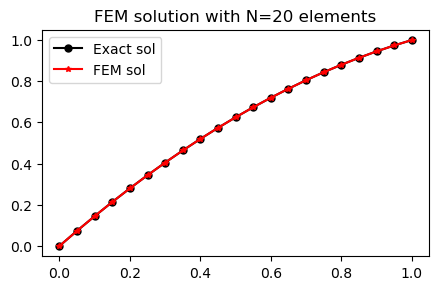

In [262]:
u = np.linalg.solve(A,f)
fig = plt.figure(figsize=(5,3),dpi=100)
uExact = -x/2 * (x-3)
plt.plot(x,uExact,'k-o',label="Exact sol",markersize=5)
plt.plot(x,u,'r-*',label="FEM sol",markersize=4)
ss = "FEM solution with N="+str(n)+" elements"
plt.legend()
plt.title(ss)
plt.show()

### Mixed boundary conditions
$$ \begin{cases} -u''(x) = 1,\quad x\in [0,1], \\ u(0)=0, \\ u'(1)=1 \end{cases}$$

In [273]:
n = 20 #number of elements
x = np.linspace(0,1,n+1)    # Definition of the n+1 vertices of the elements
h = 1/n                 # Uniform element length
dim = 1*n+1                # Number of nodes in the triangulation of [a,b] 
A = np.zeros((dim,dim))     # Linear matrix.
f = np.zeros(dim)     

for i in range(n): 
    A[i:i+2, i:i+2] = A[i:i+2, i:i+2] + np.array([[1,-1], [-1, 1]])/h
    f[i:i+2] = f[i:i+2] + h/2
    
# boundary conditions
A[0 , 0:2] = [1 , 0] 
f[0] = 0 
f[-1] += 1 #the +1 comes from the Neumann BC 

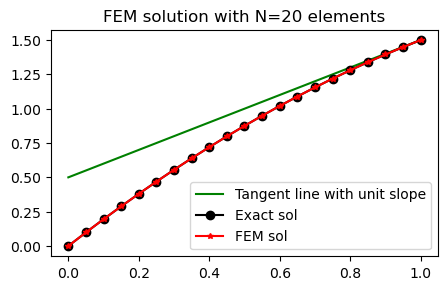

In [274]:
u = np.linalg.solve(A,f)
fig = plt.figure(figsize=(5,3),dpi=100)
uExact = x*(4-x)/2
plt.plot(x,u[-1] + (x-x[-1]),'g',label='Tangent line with unit slope')
plt.plot(x,uExact,'k-o',label="Exact sol")
plt.plot(x,u,'r-*',label="FEM sol",markersize=4)
ss = "FEM solution with N="+str(n)+" elements"
plt.legend()
plt.title(ss)
plt.show()

## Quadratic elements

### Dirichlet problem
$$ \begin{cases} -u''(x) = 1,\quad x\in [0,1], \\ u(0)=0, \\ u(1)=1 \end{cases}$$

In [291]:
n = 20 #number of elements
x = np.linspace(0,1,n+1)    # Definition of the n+1 vertices of the elements
h = 1/n                 # Uniform element length
dim = 2*n+1                # Number of nodes in the triangulation of [a,b] 
A = np.zeros((dim,dim))     # Linear matrix.
f = np.zeros(dim)           # Load vector.

In [292]:
B = 1/(3*h) * np.array([[7,-8,1],[-8,16,-8],[1,-8,7]])
b = h/6 * np.array([1,4,1])

for i in range(n): 
    A[2*i:2*(i+1)+1, 2*i:2*(i+1)+1] = A[2*i:2*(i+1)+1, 2*i:2*(i+1)+1] + B
    f[2*i:2*(i+1)+1] = f[2*i:2*(i+1)+1] + b

In [293]:
# boundary conditions
A[0 , 0:3] = [1 , 0, 0] 
A[-1 , -3:] = [0 , 0, 1]
f[0] = 0 
f[-1] = 1 #the +1 comes from the Neumann BC 

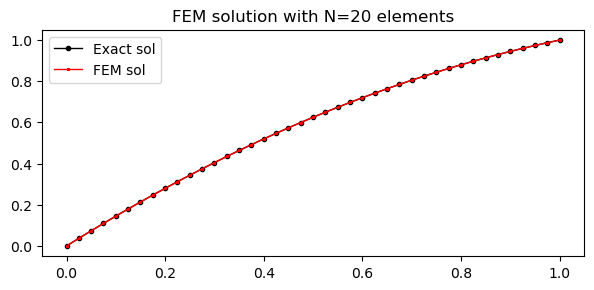

In [297]:
u = np.linalg.solve(A,f)
fig = plt.figure(figsize=(7,3),dpi=100)
xN = np.linspace(0,1,2*n+1) #nodes of the triangulation
uExact = -xN/2 * (xN-3)
plt.plot(xN,uExact,'k-o',label="Exact sol",markersize=3,linewidth=1)
plt.plot(xN,u,'r-*',label="FEM sol",markersize=2,linewidth=1)
ss = "FEM solution with N="+str(n)+" elements"
plt.legend()
plt.title(ss)
plt.show()

### Mixed boundary conditions
$$ \begin{cases} -u''(x) = 1,\quad x\in [0,1], \\ u(0)=0, \\ u'(1)=1 \end{cases}$$

In [299]:
n = 20 #number of elements
x = np.linspace(0,1,n+1)    # Definition of the n+1 vertices of the elements
h = 1/n                 # Uniform element length
dim = 2*n+1                # Number of nodes in the triangulation of [a,b] 
A = np.zeros((dim,dim))     # Linear matrix.
f = np.zeros(dim)           # Load vector.

In [300]:
B = 1/(3*h) * np.array([[7,-8,1],[-8,16,-8],[1,-8,7]])
b = h/6 * np.array([1,4,1])

for i in range(n): 
    A[2*i:2*(i+1)+1, 2*i:2*(i+1)+1] = A[2*i:2*(i+1)+1, 2*i:2*(i+1)+1] + B
    f[2*i:2*(i+1)+1] = f[2*i:2*(i+1)+1] + b

In [301]:
# boundary conditions
A[0 , 0:3] = [1 , 0, 0] 
f[0] = 0 
f[-1] += 1 #the +1 comes from the Neumann BC 

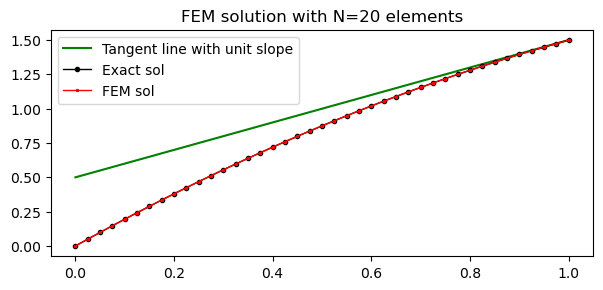

In [302]:
u = np.linalg.solve(A,f)
fig = plt.figure(figsize=(7,3),dpi=100)
xN = np.linspace(0,1,2*n+1) #nodes of the triangulation
uExact = xN*(4-xN)/2
plt.plot(xN,u[-1] + (xN-xN[-1]),'g',label='Tangent line with unit slope')
plt.plot(xN,uExact,'k-o',label="Exact sol",markersize=3,linewidth=1)
plt.plot(xN,u,'r-*',label="FEM sol",markersize=2,linewidth=1)
ss = "FEM solution with N="+str(n)+" elements"
plt.legend()
plt.title(ss)
plt.show()